In [36]:
import sklearn
print(sklearn.__version__)

1.3.0


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
#Load the csv files
df = pd.read_csv('Iris.csv')
df.head()

#deleting id column
df = df.drop(columns =['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#display basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
# display  number of samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing

In [42]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Analysis

<Axes: >

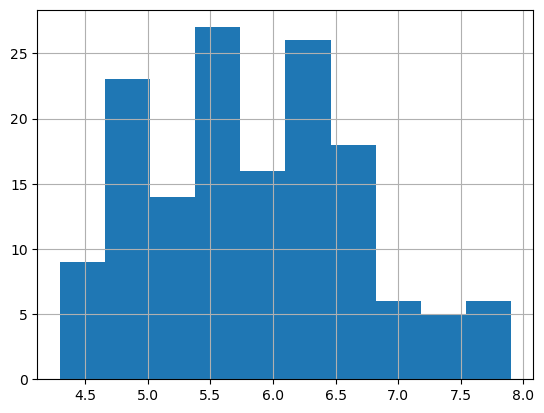

In [43]:
df['SepalLengthCm'].hist()

<Axes: >

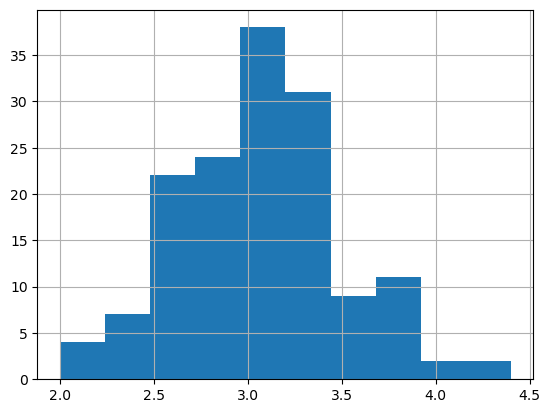

In [44]:
df['SepalWidthCm'].hist()

<Axes: >

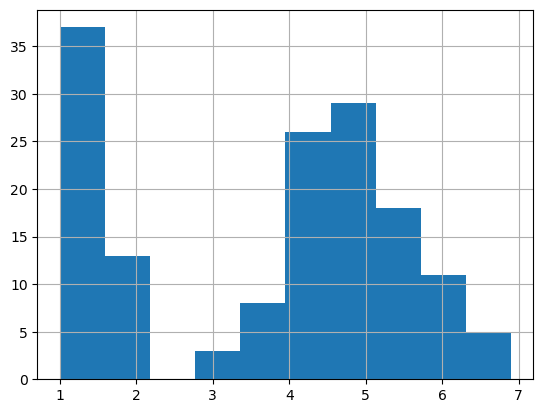

In [45]:
df['PetalLengthCm'].hist()

<Axes: >

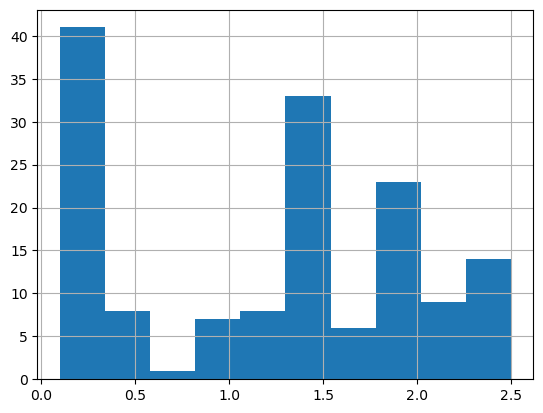

In [46]:
df['PetalWidthCm'].hist()

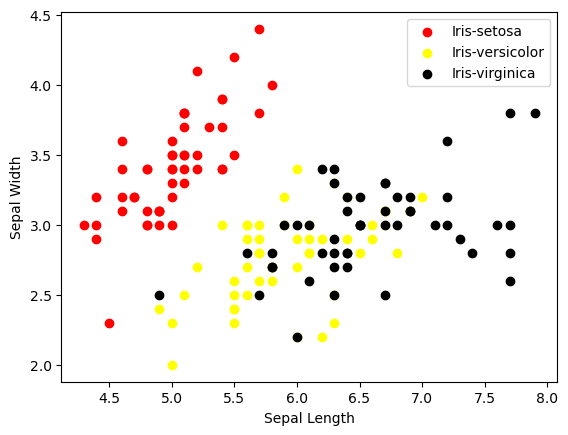

In [47]:
#create list of colors and class labels
colors = ['red', 'yellow', 'black']
species = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']

for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

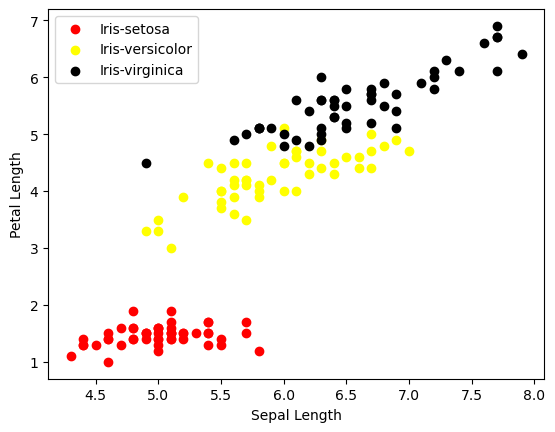

In [48]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

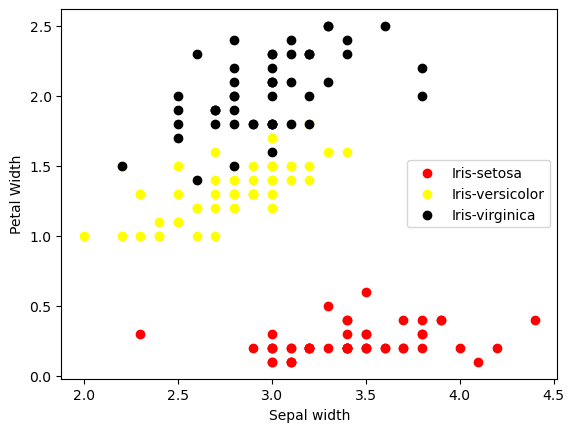

In [49]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('Petal Width')
plt.legend()

<Axes: >

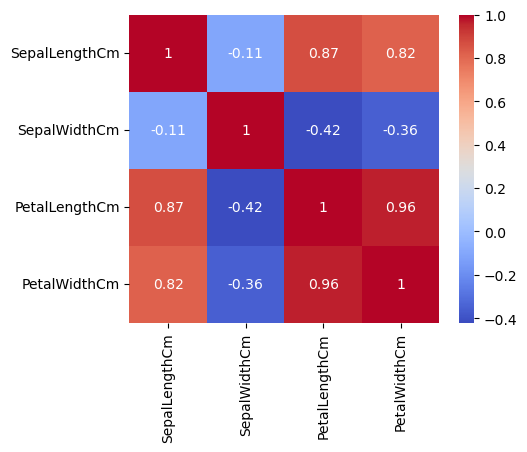

In [50]:
#display correlation matrix
df.corr()

corr = df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap =  'coolwarm')

# Label Encoder

In [51]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# #transform the string label to integer
# df['Species'] = le.fit_transform(df['Species'])
# df.head()

# Model Training and Testing

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [53]:
# input data
X = df.drop(columns=['Species'])
# output data
Y = df['Species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [54]:
# Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  97.77777777777777


In [55]:
#model training
model.fit(x_train.values, y_train.values)

LogisticRegression()

In [56]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [57]:
# K-nearest Neighbors
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("K-nearest Neighbors Accuracy: ", model.score(x_test, y_test) * 100)

#model training
model.fit(x_train.values, y_train.values)

# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest Neighbors Accuracy:  97.77777777777777
Accuracy:  97.77777777777777


In [58]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

#model training
model.fit(x_train.values, y_train.values)

# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  95.55555555555556
Accuracy:  95.55555555555556


In [30]:
# import pickle 
# filename = "saved_iris_model2.sav"
# try:
#     with open(filename, 'wb') as file:
#         pickle.dump(model, file)
#     print('Model saved successfully')
# except Exception as e:
#     print(f"Error saving the model: {e}")

Model saved successfully


In [59]:
# import pickle

# # ... (previous code)

# # Save the model using .pkl extension
# filename = "saved_iris_model.pkl"
# try:
#     with open(filename, 'wb') as file:
#         pickle.dump(model, file)
#     print('Model saved successfully')
# except Exception as e:
#     print(f"Error saving the model: {e}")

In [60]:
import joblib

# ... (previous code)

# Save the model using joblib with .pkl extension
filename = "saved_iris_model1.pkl"
try:
    with open(filename, 'wb') as file:
        joblib.dump(model, file)
    print('Model saved successfully')
except Exception as e:
    print(f"Error saving the model: {e}")


Model saved successfully


In [61]:
try:
    with open(filename, 'rb') as file:
        loaded_model = joblib.load(file)
    print('Model loaded successfully')
    # Now you can use the loaded_model for predictions
except Exception as e:
    print(f"Error loading the model: {e}")


Model loaded successfully
